# Importing modules

In [67]:
import pandas as pd               #For data manipulation and preprocessing 
import numpy as np

import matplotlib.pyplot as plt   #For plotting data
import seaborn as sns             #For plotting data

from sklearn.preprocessing import StandardScaler    #For standardisation

from sklearn.cluster import AgglomerativeClustering #For agglomerative clustering model creation
import scipy.cluster.hierarchy as sch               #For agglomerative clustering model plotting
import scipy.cluster.hierarchy as shc               #For creating dendograms

from sklearn.cluster import KMeans                  #For partitional clustering model creation


# Loading dataset

In [3]:
df=pd.read_csv('CC GENERAL.csv')

# Data exploration

In [4]:
df.head()     #Print first 5 rows

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
df.tail(1)      #Print last line to get the number of rows
#our data contains 8950 row

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.0,127.040008,0.666667,0.666667,0.0,0.333333,2,23,1200.0,63.165404,88.288956,0.0,6


In [9]:
df.info()       #Print general information about our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [10]:
df.describe()        

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [12]:
df.isnull().sum()            #get null values

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# Data preprocessing

In [13]:
#replacing null values with average values
df=df.fillna(df.mean())

In [14]:
#drop categorical variable 'CUST_ID' wich is not imprtant in our case
df.drop("CUST_ID", axis=1, inplace=True)

In [15]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Data viz

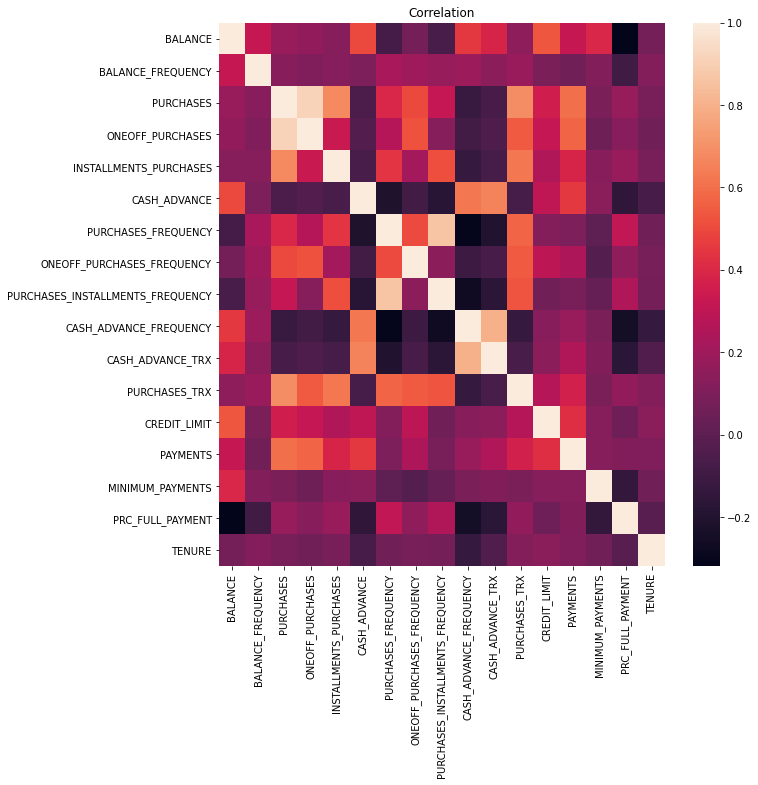

In [33]:
#discover correlations
fig1=plt.figure(figsize=(10,10))
plt.title('Correlation')
sns.heatmap(df.corr(),xticklabels=df.columns,yticklabels=df.columns)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

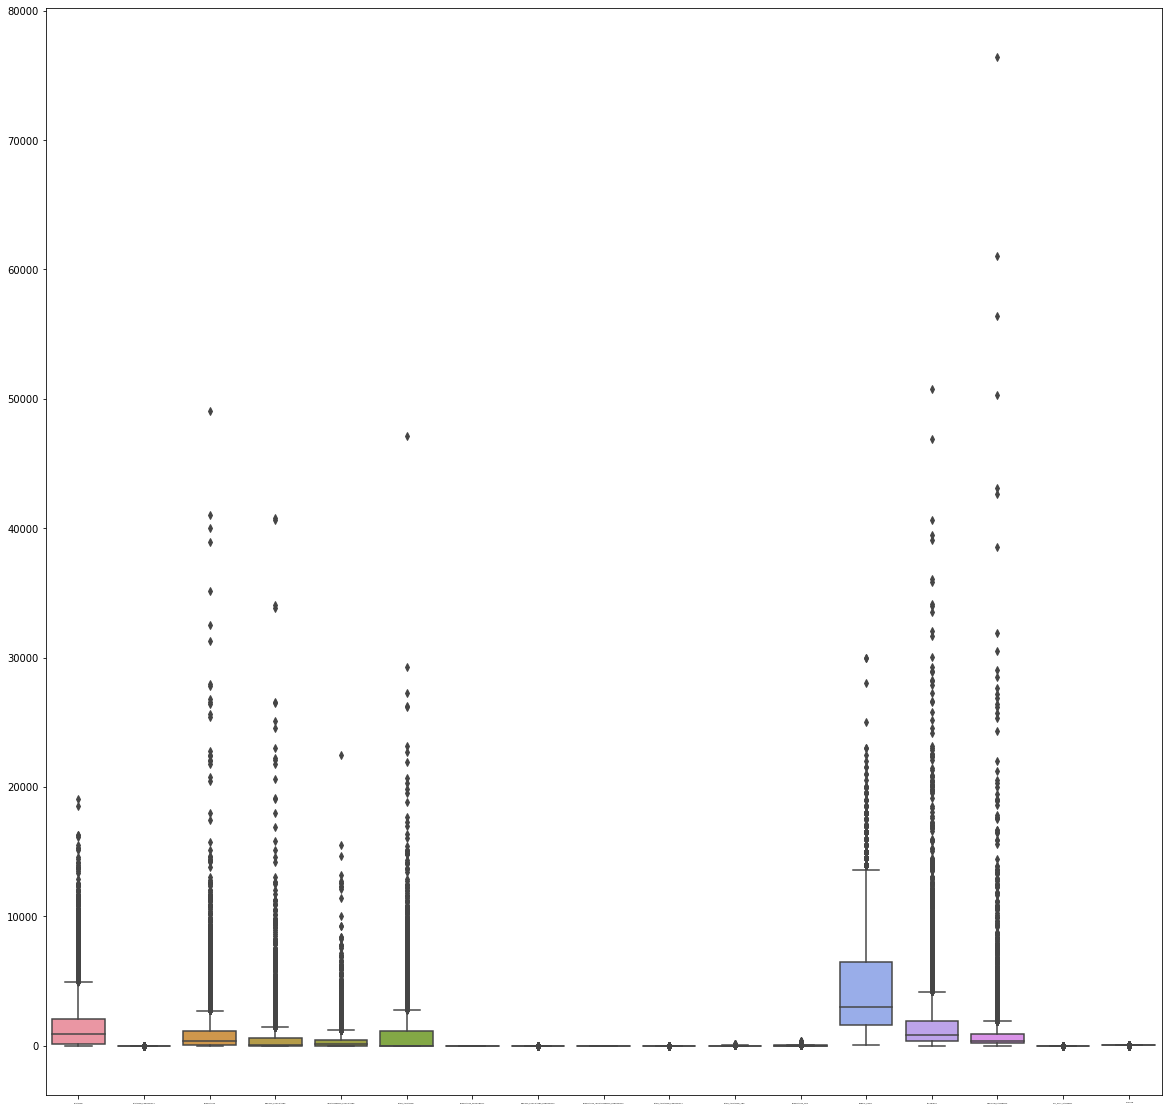

In [32]:
fig2=plt.figure(figsize=(20,20))
sns.boxplot(data=df)
plt.xticks(fontsize=2)

In [28]:
#standardisation
scaler=StandardScaler()
scaler.fit(df)
scaler.transform(df)

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

# hierarchical Clustering

In [40]:
model1=AgglomerativeClustering(n_clusters=4) #model creation
clust_labels1=model1.fit_predict(df)  #fitting data

In [41]:
agg1=pd.DataFrame(clust_labels1)
agg1

,0
0,3
1,0
2,0
3,0
4,3
...,...
8945,3
8946,3
8947,3
8948,3


'We can see four distincts groups through the plot:\n1)People with high payments and with high purchases\n2)People with medium income and with medium purchases\n3)People with medium high income and with low purchases\n4)people with low income and with low purchases\n'

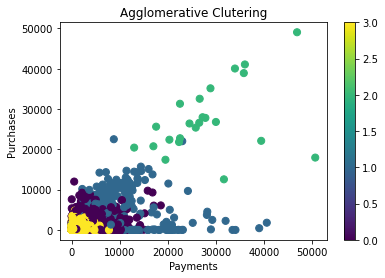

In [43]:
#Plotting clusters
fig3= plt.figure()
ax3=fig3.add_subplot(111)
scatter3=ax3.scatter(df['PAYMENTS'],df['PURCHASES'],c=agg1[0],s=50)
ax3.set_title("Agglomerative Clutering")
ax3.set_xlabel("Payments")
ax3.set_ylabel("Purchases")
plt.colorbar(scatter3)
"""We can see four distincts groups through the plot:
1)People with high payments and with high purchases
2)People with medium income and with medium purchases
3)People with medium high income and with low purchases
4)people with low income and with low purchases
"""

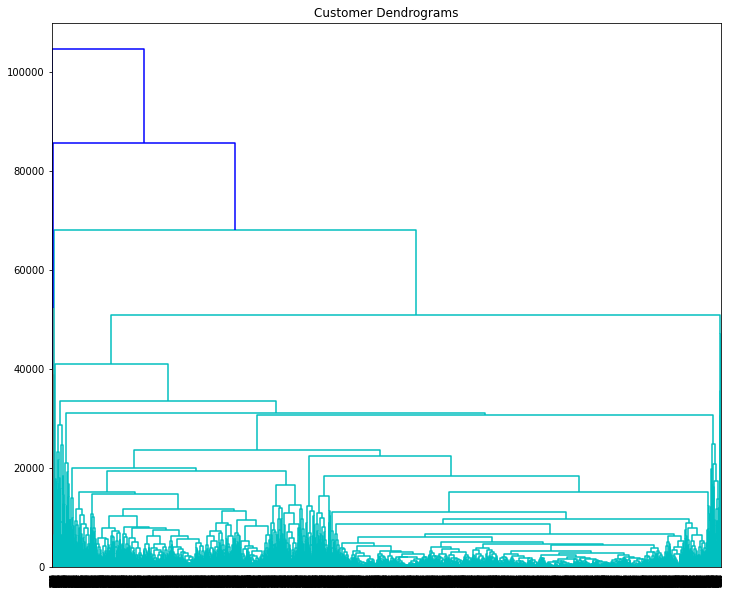

In [90]:
fig4=plt.figure(figsize=(12,10))
plt.title("Customer Dendrograms")
dend4=shc.dendrogram(shc.linkage(df, method="complete"))

# K-means Clustering

In [50]:
#Choosing k
x = []
for i in range( 1, 30 ):
    kmeans = KMeans(n_clusters=i) 
    kmeans.fit_predict( df)
    x.append( kmeans.inertia_ )   

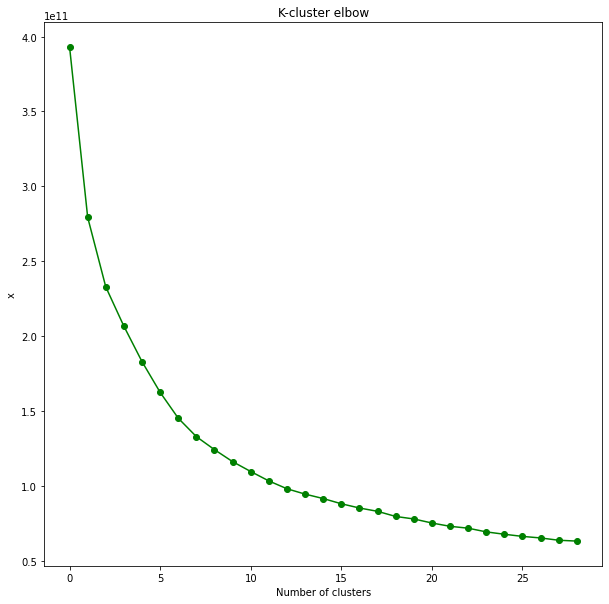

In [58]:
fig5=plt.figure(figsize=(10,10))
plt.plot( x, 'go-')
plt.title('K-cluster elbow')
plt.xlabel("Number of clusters")
plt.ylabel("x")
plt.show()
#we'll choose k=4

In [62]:
kmeans=KMeans(n_clusters=4, random_state=0)  #Creating model
kmeans.fit(df)    #Fitting data
y_pred=kmeans.fit_predict(df)

(array([6474., 2291.,   56.,  129.]),
 array([0, 1, 2, 3, 4]),
 <a list of 4 Patch objects>)

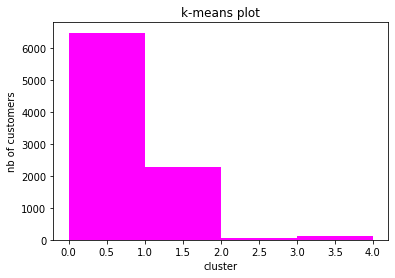

In [77]:
#Plotting clusters
fig6=plt.figure()
plt.title('k-means plot')
plt.xlabel('cluster')
plt.ylabel('nb of customers')
plt.hist(x=y_pred, bins=range(5), color='magenta')

<Figure size 432x288 with 0 Axes>

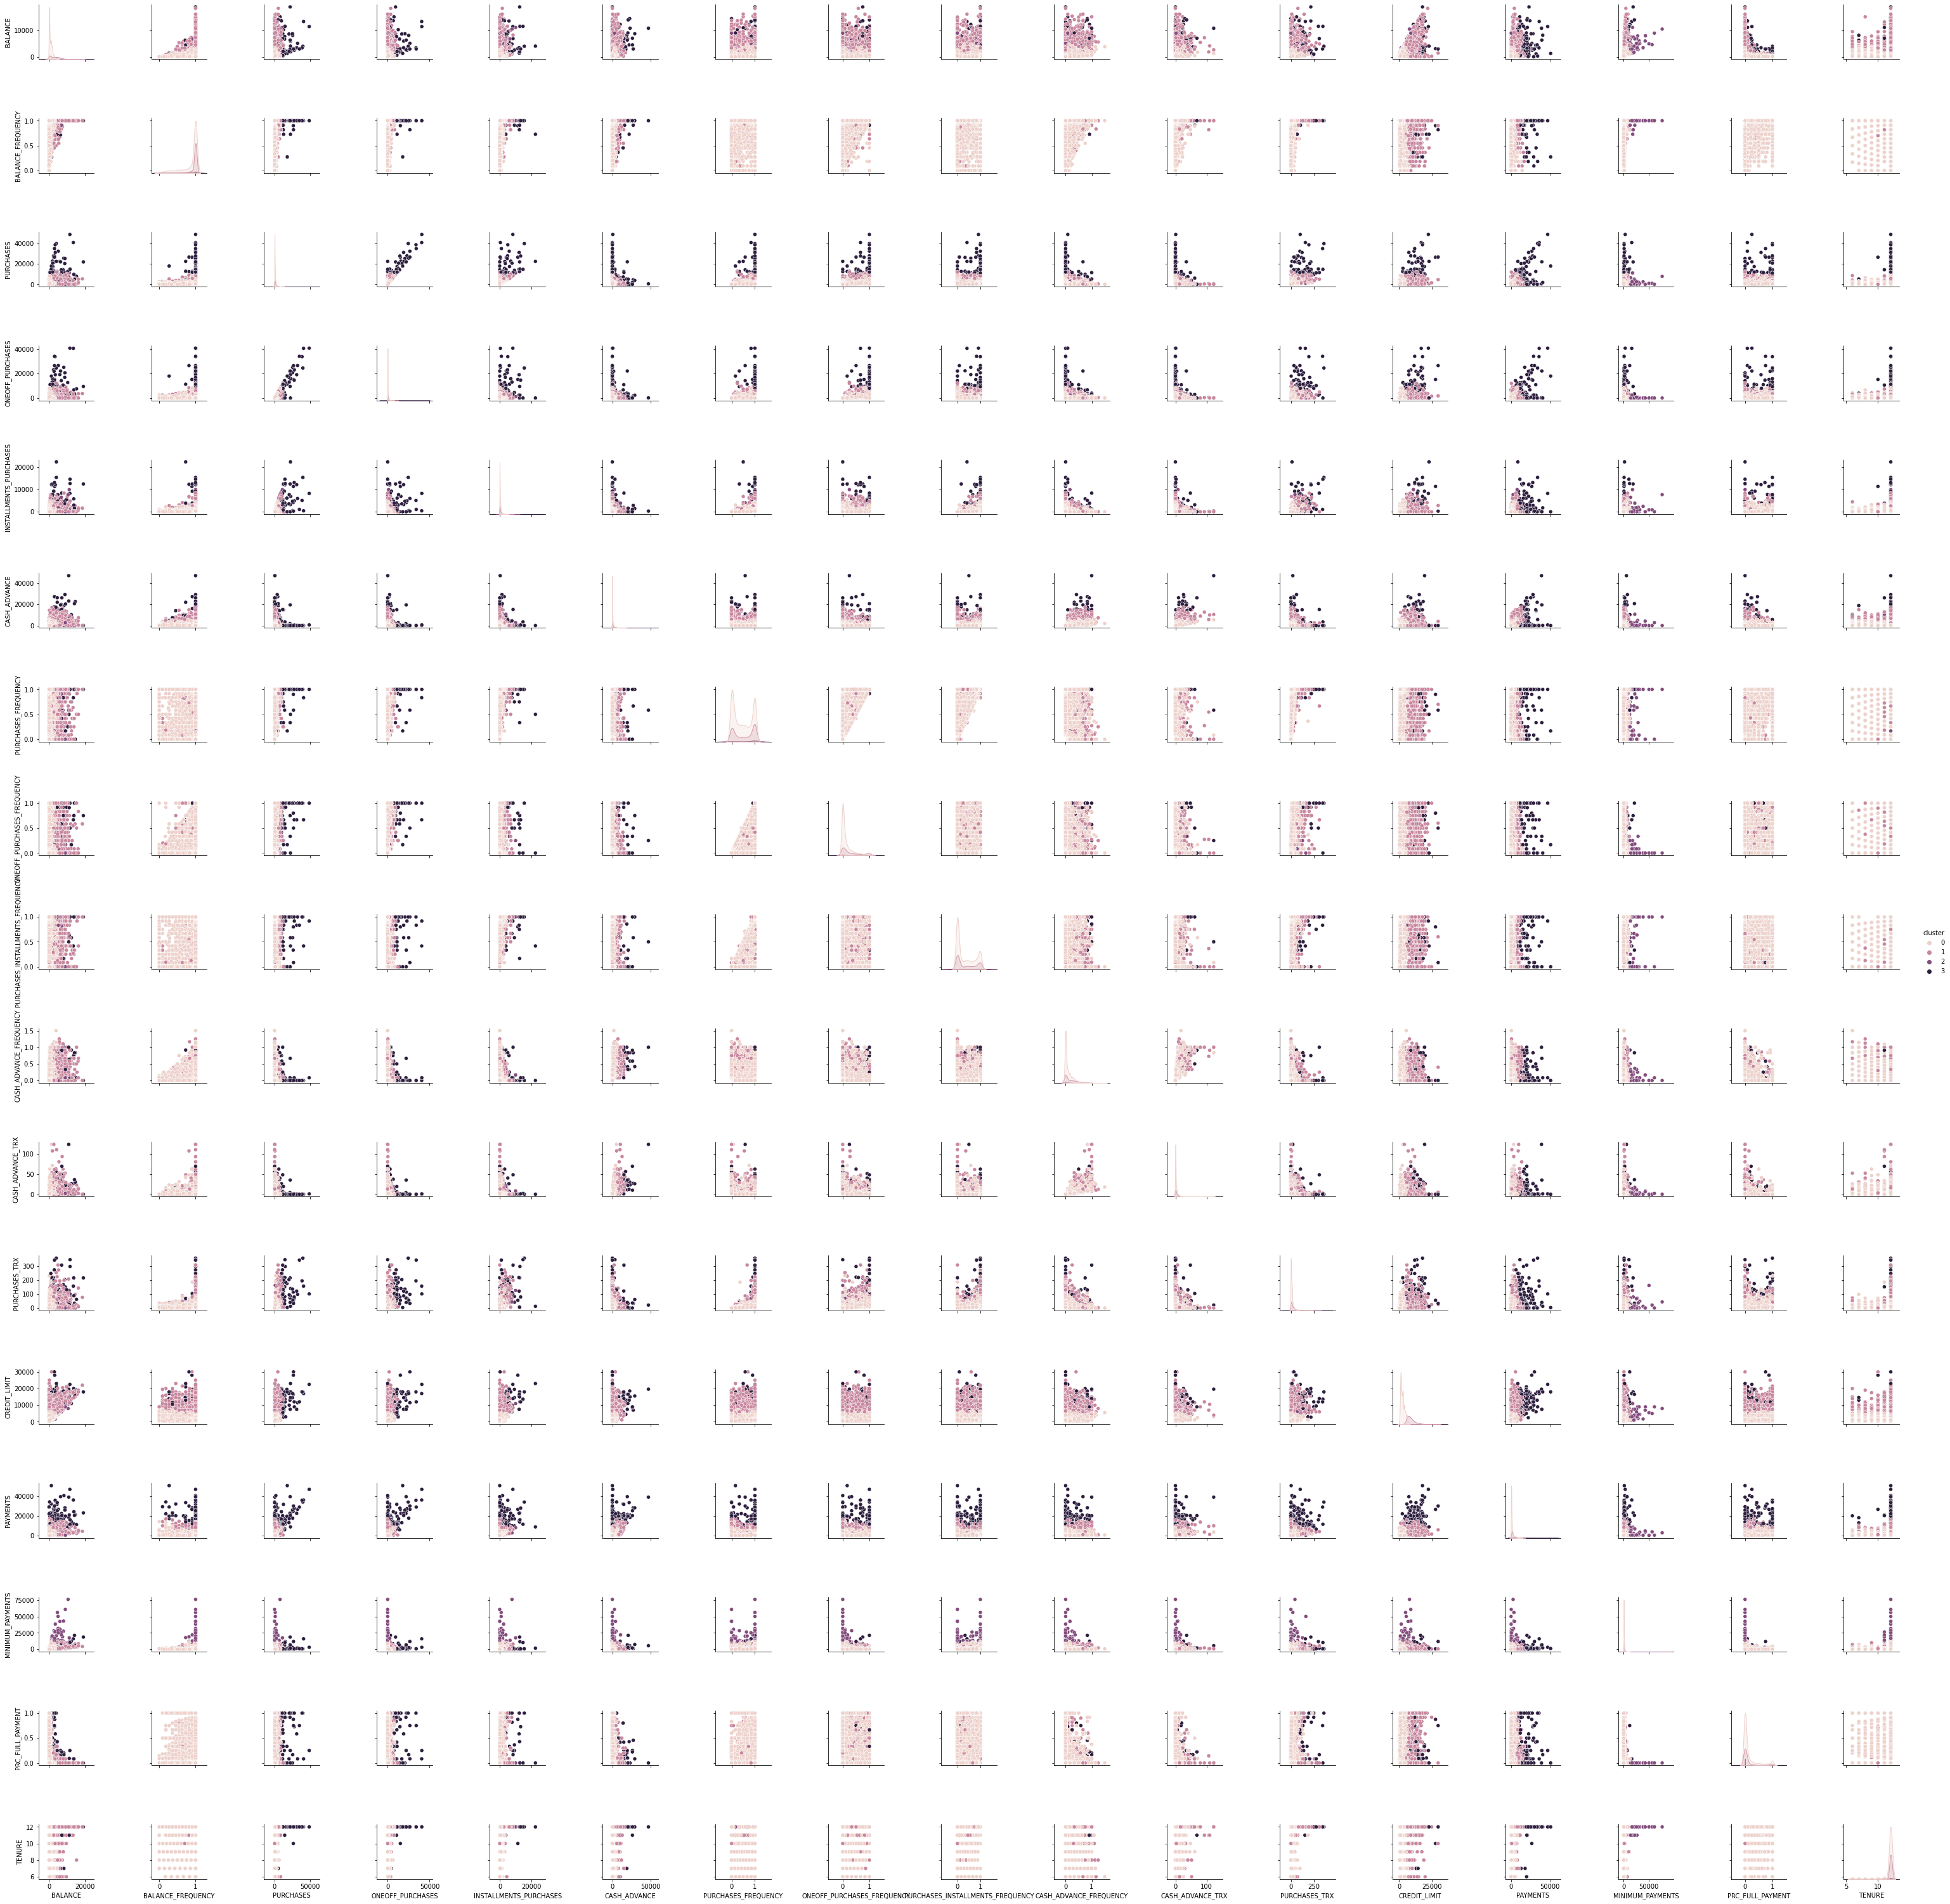

In [91]:
df["cluster"]=y_pred
cols=list(df.columns)

fig7=plt.figure()
sns.pairplot(df[cols], hue="cluster")

<Figure size 432x288 with 0 Axes>

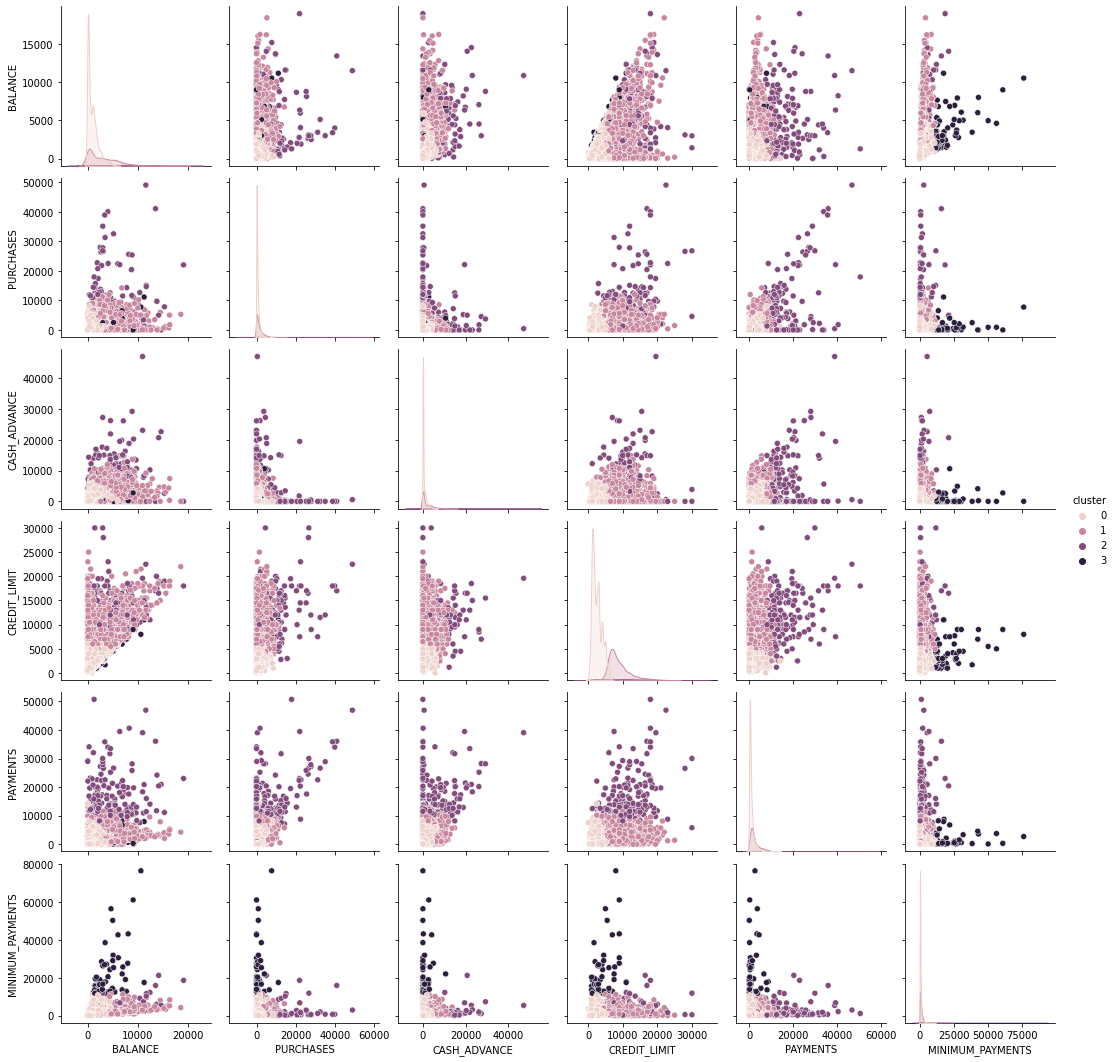

In [92]:
#choosing best features
best_cols=["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]

best_vals=df[best_cols].iloc[:, 1:].values
y_pred=kmeans.fit_predict(best_vals)

df["cluster"]=y_pred
best_cols.append("cluster")

fig8=plt.figure()
sns.pairplot(df[ best_cols ], hue="cluster")


In [82]:
#we create a data frame from the predicted data
pred = pd.DataFrame(y_pred)
pred.columns = ['customers']

#we merge this dataframe with df
prediction = pd.concat([df,pred], axis = 1)

#We store the clusters
clus0 = prediction.loc[prediction.customers == 0]
clus1 = prediction.loc[prediction.customers == 1]
clus2 = prediction.loc[prediction.customers == 2]
k_list = [clus0.values, clus1.values,clus2.values]

In [93]:
#using Dunn index to measure performance
import base
base.dunn(k_list)

0.002859735979534099